### Medical Data Visualizer



---



**Import the data from medical_examination.csv and assign it to the df variable.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('medical_examination.csv', index_col = 'id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0




---



**Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.**

In [8]:
df['overweight'] = np.where(df['weight'] / ((df['height'] / 100) ** 2) > 25, 1, 0)
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1




---



**Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.**

In [9]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df.head(9)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1




---



**Draw the Categorical Plot in the draw_cat_plot function.**

**Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().
Get the figure for the output and store it in the fig variable.**

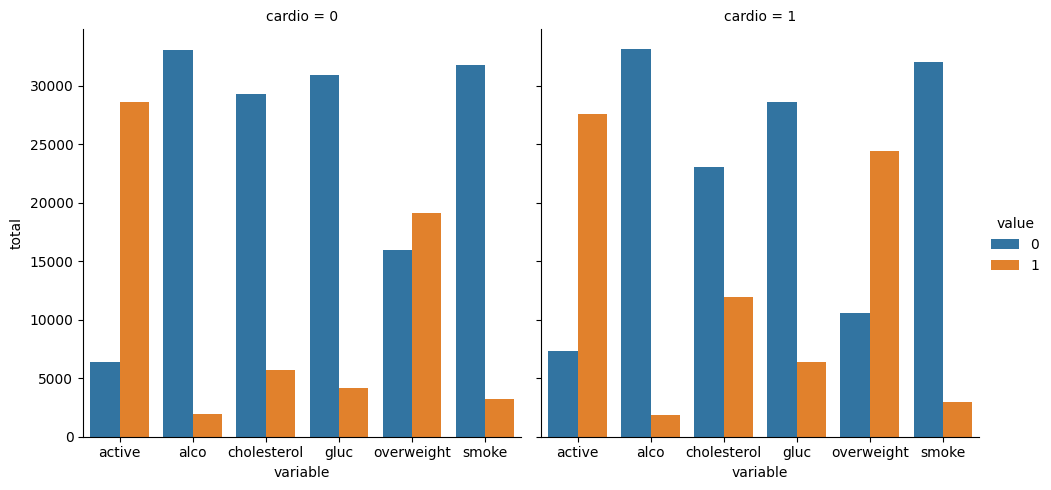

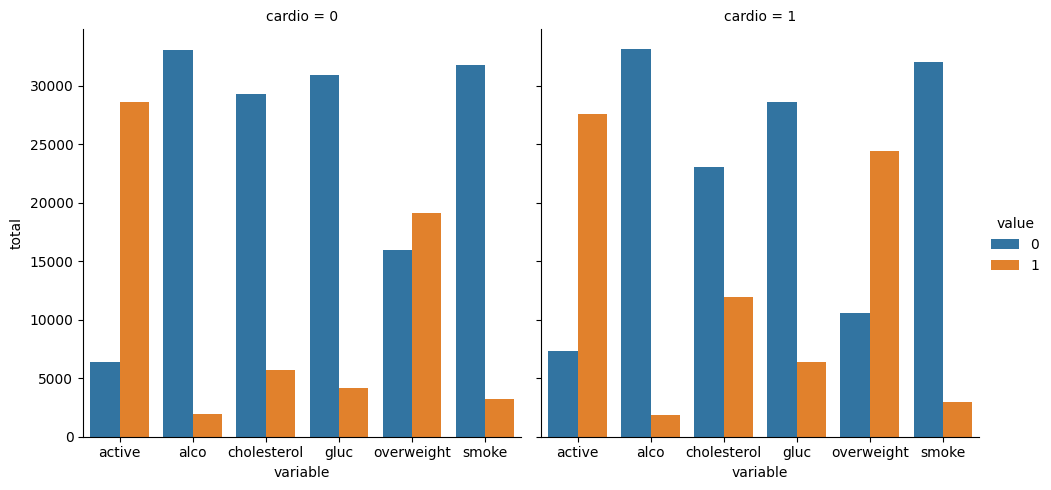

In [17]:
import seaborn as sns
df_cat = pd.melt(df,
                     id_vars=['cardio'],
                     value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total')

g = sns.catplot(data=df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar')
fig1 = g.fig
fig1



---



**diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile**

In [18]:
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0


In [20]:
df_heat = df[df['ap_lo'] <= df['ap_hi']]
df_heat = df_heat[df_heat['height'] >= df_heat['height'].quantile(0.025)]
df_heat.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0




---



**Calculate the correlation matrix and store it in the corr variable.

Generate a mask for the upper triangle and store it in the mask variable.
Set up the matplotlib figure.**

Text(0.5, 1.0, 'General Health Statistics')

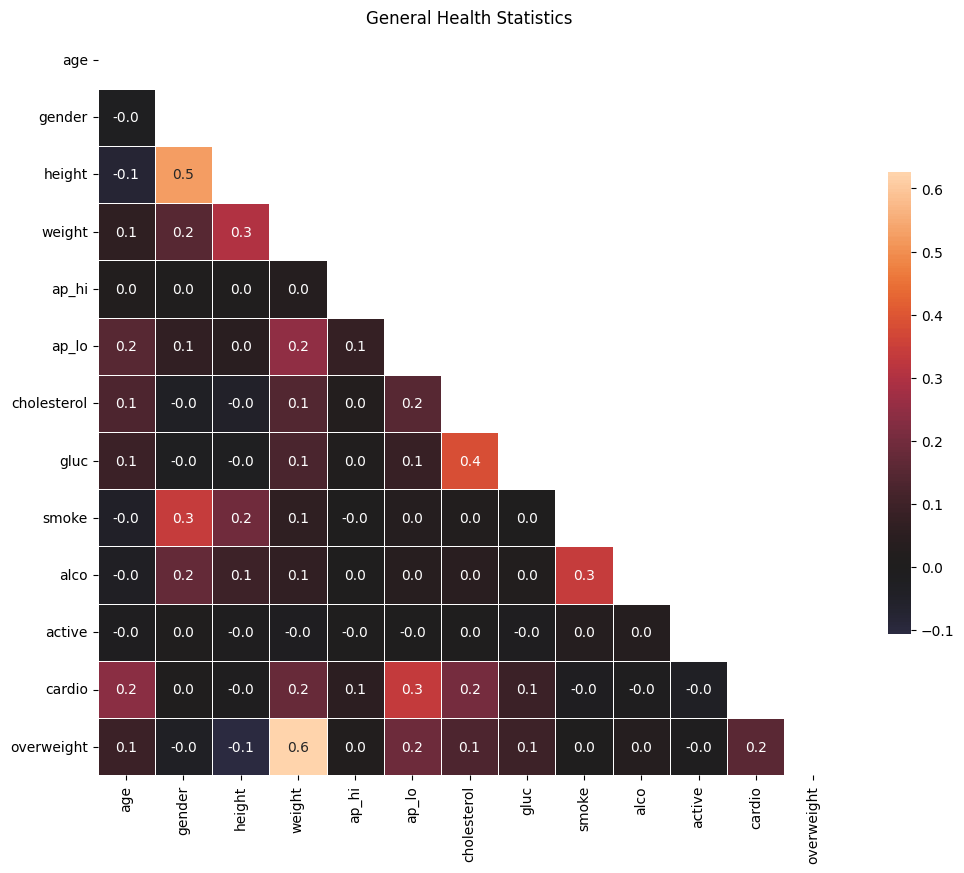

In [25]:
corr = df_heat.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(12, 12))


sns.heatmap(corr,
            mask=mask,
            annot=True,
            fmt=".1f",
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})
ax.set_title('General Health Statistics')